In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_preparation.train_test import make_train_test

In [2]:
x_train, x_test, y_train, y_test = make_train_test(bins_interval=[0,10],
                                                   bins_step=1,
                                                   test_size=0.2,
                                                   random_state=2022)

In [3]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50, min_samples_leaf=1, criterion='absolute_error')

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

(-10.0, 250.0)

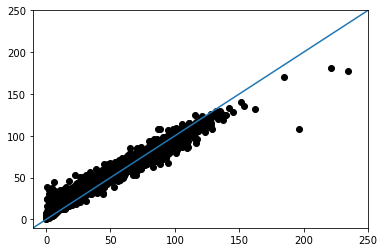

In [4]:
min = -10
max = 250

plt.plot(y_train, y1_pred, 'o', color='black')
plt.plot([min,max], [min,max])
plt.xlim(min,max)
plt.ylim(min,max)

Q2: 0.7365156341066539
r2_test: 0.7429994215740581
MAE_test: 10.165669164378201
MSE_test: 249.55076764643675
RMSE_test: 15.797175938959366
r2_train: 0.9551900565615603
MAE_train: 3.9407069499960303
MSE_train: 37.987225172145024
RMSE_train: 6.163377740504392


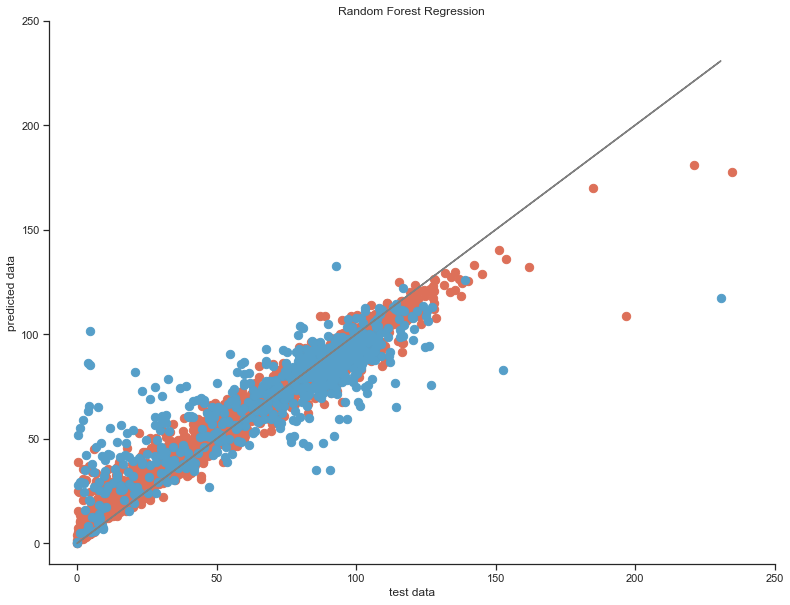

In [5]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10)
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(min,max)
plt.ylim(min,max)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def rfr_model(x, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(x, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, x, y, cv=10, 
                             scoring='neg_mean_absolute_error')

    return scores

predictions = cross_val_predict(rfr, x, y, cv=10)
accuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                           scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(0.25, 1)
plt.ylim(0.25, 1)
plt.show()